In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from shapely import wkt

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


<Axes: >

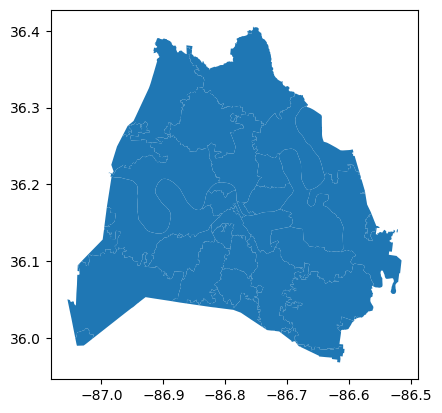

In [3]:
zipcodes.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

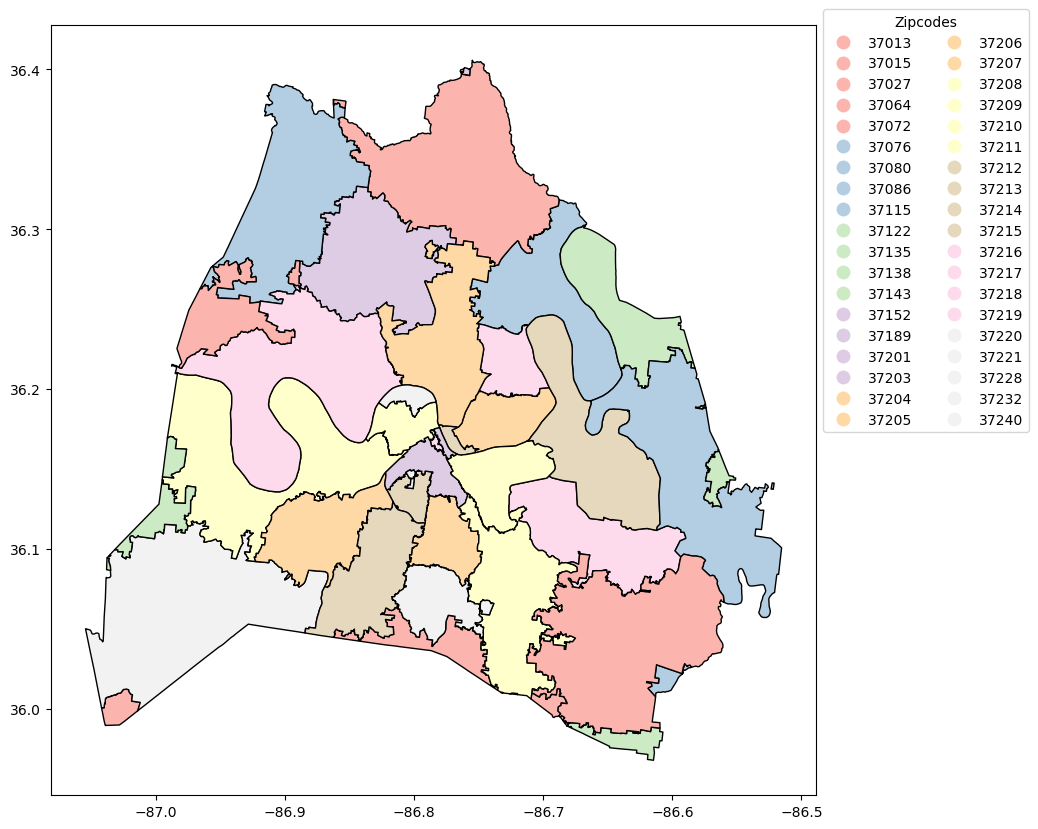

In [4]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left',
           'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize= (10, 10),
             edgecolor = 'black',
             legend = True, legend_kwds = leg_kwds,
             cmap = 'Pastel1')

plt.show

In [6]:
trips = pd.read_csv('../data/trips.csv')
print(trips.shape)
trips.head(3)

(565522, 18)


,pubtimestamp,companyname,triprecordnum,sumdid,tripduration,tripdistance,startdate,starttime,enddate,endtime,startlatitude,startlongitude,endlatitude,endlongitude,triproute,create_dt,Dates,day
0,2019-06-25 20:40:11.920,Lyft,LFT745,Powered286845,10.154667,4169.94764,2019-06-25,20:30:02.530000,2019-06-25,20:40:11.810000,36.1837,-86.74686,36.18278,-86.73295,"[(36.1837, -86.74686), (36.18369, -86.74674), ...",2019-06-26 09:20:23.263,2019-06-25,Tuesday
1,2019-06-25 20:42:18.173,Bird,BRD1574,Powered7S2UU,6.000000,328.08400,2019-06-25,20:37:40.546666,2019-06-25,20:43:15.786666,36.1576,-86.78300,36.15760,-86.78130,"[(36.15763, -86.782869), (36.157551, -86.78277...",2019-06-26 05:32:29.967,2019-06-25,Tuesday
2,2019-06-25 20:42:18.173,Bird,BRD1577,PoweredE1MVD,15.000000,0.00000,2019-06-25,20:27:11.173333,2019-06-25,20:42:24.590000,36.1748,-86.75720,36.19940,-86.73310,"[(36.174883, -86.757055), (36.174908, -86.7570...",2019-06-26 05:32:30.057,2019-06-25,Tuesday


In [7]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565522 entries, 0 to 565521
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pubtimestamp    565522 non-null  object 
 1   companyname     565522 non-null  object 
 2   triprecordnum   565522 non-null  object 
 3   sumdid          565522 non-null  object 
 4   tripduration    565522 non-null  float64
 5   tripdistance    565522 non-null  float64
 6   startdate       565522 non-null  object 
 7   starttime       565522 non-null  object 
 8   enddate         565522 non-null  object 
 9   endtime         565522 non-null  object 
 10  startlatitude   565522 non-null  float64
 11  startlongitude  565522 non-null  float64
 12  endlatitude     565522 non-null  float64
 13  endlongitude    565522 non-null  float64
 14  triproute       565522 non-null  object 
 15  create_dt       565522 non-null  object 
 16  Dates           565522 non-null  object 
 17  day       

In [9]:
type(trips)

pandas.core.frame.DataFrame

In [11]:
trips_geo = gpd.GeoDataFrame(trips,
                            crs = zipcodes.crs,
                            geometry = gpd.points_from_xy(trips. startlongitude, trips.startlatitude))

In [12]:
type(trips_geo)

geopandas.geodataframe.GeoDataFrame

In [13]:
trips_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [15]:
gpd.sjoin(trips_geo, zipcodes, predicate = 'within')

,pubtimestamp,companyname,triprecordnum,sumdid,tripduration,tripdistance,startdate,starttime,enddate,endtime,...,endlatitude,endlongitude,triproute,create_dt,Dates,day,geometry,index_right,zip,po_name
0,2019-06-25 20:40:11.920,Lyft,LFT745,Powered286845,10.154667,4169.94764,2019-06-25,20:30:02.530000,2019-06-25,20:40:11.810000,...,36.182780,-86.732950,"[(36.1837, -86.74686), (36.18369, -86.74674), ...",2019-06-26 09:20:23.263,2019-06-25,Tuesday,POINT (-86.74686 36.18370),13,37206,NASHVILLE
1,2019-06-25 20:42:18.173,Bird,BRD1574,Powered7S2UU,6.000000,328.08400,2019-06-25,20:37:40.546666,2019-06-25,20:43:15.786666,...,36.157600,-86.781300,"[(36.15763, -86.782869), (36.157551, -86.78277...",2019-06-26 05:32:29.967,2019-06-25,Tuesday,POINT (-86.78300 36.15760),35,37203,NASHVILLE
2,2019-06-25 20:42:18.173,Bird,BRD1577,PoweredE1MVD,15.000000,0.00000,2019-06-25,20:27:11.173333,2019-06-25,20:42:24.590000,...,36.199400,-86.733100,"[(36.174883, -86.757055), (36.174908, -86.7570...",2019-06-26 05:32:30.057,2019-06-25,Tuesday,POINT (-86.75720 36.17480),13,37206,NASHVILLE
3,2019-06-25 20:42:18.173,Bird,BRD1571,PoweredH1DGN,5.000000,0.00000,2019-06-25,20:38:36.316666,2019-06-25,20:43:19.146666,...,36.162400,-86.781700,"[(36.15867, -86.789969), (36.158759, -86.78994...",2019-06-26 05:32:29.870,2019-06-25,Tuesday,POINT (-86.79000 36.15860),35,37203,NASHVILLE
4,2019-06-25 20:42:18.173,Bird,BRD1576,PoweredUJHQ7,14.000000,0.00000,2019-06-25,20:30:00.226666,2019-06-25,20:44:00.933333,...,36.163500,-86.779100,"[(36.162531, -86.77462), (36.162531, -86.77462...",2019-06-26 05:32:30.027,2019-06-25,Tuesday,POINT (-86.77470 36.16250),36,37201,NASHVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565517,2019-06-25 20:28:24.600,Lyft,LFT728,Powered883652,7.973983,1528.87144,2019-06-25,20:20:26.043333,2019-06-25,20:28:24.483333,...,36.155120,-86.785030,"[(36.1526, -86.78294), (36.15264, -86.78294), ...",2019-06-26 09:20:22.777,2019-06-25,Tuesday,POINT (-86.78294 36.15260),35,37203,NASHVILLE
565518,2019-06-25 20:28:35.693,SPIN,SPI139,Powered7266480,32.000000,1210.62996,2019-06-25,19:56:32,2019-06-25,20:28:17,...,36.177147,-86.788110,"[(36.1771465698594, -86.7881097738508), (36.17...",2019-06-26 10:02:48.010,2019-06-25,Tuesday,POINT (-86.78492 36.17505),40,37208,NASHVILLE
565519,2019-06-25 20:28:35.693,SPIN,SPI140,Powered7950702,20.000000,3592.51980,2019-06-25,20:08:25,2019-06-25,20:28:09,...,36.165079,-86.783735,"[(36.165078950560996, -86.78373466178222), (36...",2019-06-26 10:02:47.977,2019-06-25,Tuesday,POINT (-86.78077 36.15554),35,37203,NASHVILLE
565520,2019-06-25 20:28:51.730,Lyft,LFT729,Powered434850,40.935733,14730.97160,2019-06-25,19:47:55.460000,2019-06-25,20:28:51.606666,...,36.176580,-86.787370,"[(36.17524, -86.78471), (36.17528, -86.78469),...",2019-06-26 09:20:22.807,2019-06-25,Tuesday,POINT (-86.78471 36.17524),40,37208,NASHVILLE


In [16]:
trips_by_zip = gpd.sjoin(trips_geo, zipcodes, predicate = 'within')

In [17]:
trips_by_zip.head()

,pubtimestamp,companyname,triprecordnum,sumdid,tripduration,tripdistance,startdate,starttime,enddate,endtime,...,endlatitude,endlongitude,triproute,create_dt,Dates,day,geometry,index_right,zip,po_name
0,2019-06-25 20:40:11.920,Lyft,LFT745,Powered286845,10.154667,4169.94764,2019-06-25,20:30:02.530000,2019-06-25,20:40:11.810000,...,36.18278,-86.73295,"[(36.1837, -86.74686), (36.18369, -86.74674), ...",2019-06-26 09:20:23.263,2019-06-25,Tuesday,POINT (-86.74686 36.18370),13,37206,NASHVILLE
1,2019-06-25 20:42:18.173,Bird,BRD1574,Powered7S2UU,6.000000,328.08400,2019-06-25,20:37:40.546666,2019-06-25,20:43:15.786666,...,36.15760,-86.78130,"[(36.15763, -86.782869), (36.157551, -86.78277...",2019-06-26 05:32:29.967,2019-06-25,Tuesday,POINT (-86.78300 36.15760),35,37203,NASHVILLE
2,2019-06-25 20:42:18.173,Bird,BRD1577,PoweredE1MVD,15.000000,0.00000,2019-06-25,20:27:11.173333,2019-06-25,20:42:24.590000,...,36.19940,-86.73310,"[(36.174883, -86.757055), (36.174908, -86.7570...",2019-06-26 05:32:30.057,2019-06-25,Tuesday,POINT (-86.75720 36.17480),13,37206,NASHVILLE
3,2019-06-25 20:42:18.173,Bird,BRD1571,PoweredH1DGN,5.000000,0.00000,2019-06-25,20:38:36.316666,2019-06-25,20:43:19.146666,...,36.16240,-86.78170,"[(36.15867, -86.789969), (36.158759, -86.78994...",2019-06-26 05:32:29.870,2019-06-25,Tuesday,POINT (-86.79000 36.15860),35,37203,NASHVILLE
4,2019-06-25 20:42:18.173,Bird,BRD1576,PoweredUJHQ7,14.000000,0.00000,2019-06-25,20:30:00.226666,2019-06-25,20:44:00.933333,...,36.16350,-86.77910,"[(36.162531, -86.77462), (36.162531, -86.77462...",2019-06-26 05:32:30.027,2019-06-25,Tuesday,POINT (-86.77470 36.16250),36,37201,NASHVILLE


In [18]:
trips_by_zip['zip'].value_counts()

zip
37203    258255
37201    102877
37219     46556
37212     35628
37204     28374
37208     23216
37213     21552
37206     20864
37210     13428
37240      5226
37232      2786
37207      2674
37209      2045
37228       509
37215       464
37216       409
37205       354
37211       113
37217        51
37214        44
37013        39
37218        24
37115        16
37221        10
37220         3
37138         2
37072         1
Name: count, dtype: int64

In [19]:
trips_in_37228 = trips_by_zip.loc[trips_by_zip['zip'] == '37228']
trips_in_37228.shape

(509, 22)

In [20]:
zipcodes.head()

,zip,po_name,geometry
0,37115,MADISON,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,NASHVILLE,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,NASHVILLE,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,BRENTWOOD,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,FRANKLIN,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [21]:
polygon37228 = zipcodes.loc[zipcodes['zip'] == '37228']
polygon37228.shape

(1, 3)

In [22]:
polygon37228.drop_duplicates()

,zip,po_name,geometry
45,37228,NASHVILLE,"MULTIPOLYGON (((-86.78387 36.19400, -86.78318 ..."


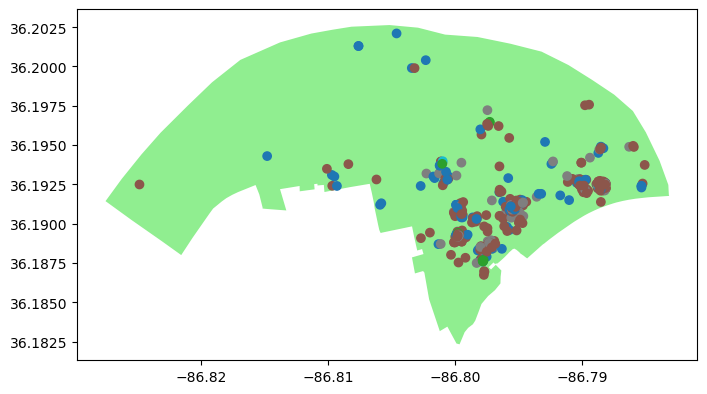

In [23]:
#fig, ax = matplotlib.subplots()
ax = polygon37228.plot(figsize = (8, 10), color = 'lightgreen')
trips_in_37228.plot(ax = ax, column = 'companyname');
plt.show();

In [24]:
polygon37228.geometry.centroid

C:\Users\joshh\AppData\Local\Temp\ipykernel_13160\3343910634.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37228.geometry.centroid


45    POINT (-86.80400 36.19479)
dtype: geometry

In [25]:
center = polygon37228.geometry.centroid[45]

C:\Users\joshh\AppData\Local\Temp\ipykernel_13160\2189651426.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37228.geometry.centroid[45]


In [26]:
area_center = [center.y, center.x]
print(area_center)

[36.19479107343121, -86.80400283867507]


In [29]:
map_37228 = folium.Map(location = area_center, zoom_start = 14)
map_37228

In [43]:
map_37228 = folium.Map(location = area_center, zoom_start = 14)

folium.GeoJson(polygon37228).add_to(map_37228)

for row_index, row_values in trips_in_37228.iterrows():
    loc = [row_values['startlatitude'], row_values['startlongitude']]
    pop = str(row_values['companyname'])
    icon=folium.Icon(color="lightred", icon="location-dot", prefix='fa')
    
    marker = folium.Marker(
        location = loc,
    popup = pop, icon = icon)
    
    marker.add_to(map_37228)
map_37228.save('../data/map37228.html')

map_37228

In [50]:
cluster_map_37228 = folium.Map(location = area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_37228)

folium.GeoJson(polygon37228).add_to(cluster_map_37228)

for row_index, row_values in trips_in_37228.iterrows():
    loc = [row_values['startlatitude'], row_values['startlongitude']]
    pop = str(row_values['companyname'])
    icon=folium.Icon(color="lightred", icon="location-dot", prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(marker_cluster)

cluster_map_37228.save('../data/cluster37228.html')
    
cluster_map_37228

In [ ]:
query = '''
    SELECT *
FROM trips
WHERE tripduration > 1 AND tripduration < (60*24)
'''

with engine.connect() as connection:
#    clean_trips = pd.read_sql(text(query), con = connection)
#clean_trips.to_csv('../data/clean_trips.csv', index=False)
clean_trips = pd.read_csv('../data/clean_trips.csv')
clean_trips.head()